In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

sns.set(#font='Franklin Gothic Book',
        rc={
         'axes.axisbelow': False,
         'axes.edgecolor': 'Black',
         'axes.facecolor': 'w', 
                            # '#aeaeae',
         'axes.grid': False,
         'axes.labelcolor': 'k',
         'axes.spines.right': True,
         'axes.spines.top': True,
         'figure.facecolor': 'white',
         'lines.solid_capstyle': 'round',
         'patch.edgecolor': 'k',
         'patch.force_edgecolor': True,
         'text.color': 'k',
         'xtick.bottom': True,
         'xtick.color': 'k',
         'xtick.direction': 'out',
         'xtick.top': False,
         'ytick.color': 'k',
         'ytick.direction': 'out',
         'ytick.left': True,
         'ytick.right': False},
         font_scale=1)
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["axes.titlesize"] = 22
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["font.size"] = 18
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
mpl.rcParams["ytick.labelright"] = False

In [2]:
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Rectangle

def add_arrow(ax, x_start, y_start, y_end, x_end=None, rad=-0.3, arrowstyle="-|>", **kwargs):
    """Add a curved arrow using ax.annotate"""
    if x_end is None:
        x_end = x_start

    # Curvature can be handled by adjusting the connectionstyle argument for the curved arrow
    connectionstyle = f"arc3,rad={rad}"  # Curvature (negative for downward curve)

    ax.annotate(
        "",  # Empty string means no label is added
        xy=(x_end, y_end),  # End point of the arrow
        xytext=(x_start, y_start),  # Start point of the arrow
        arrowprops=dict(
            facecolor="black",  # Arrow color
            edgecolor="black",  # Arrow border color
            arrowstyle=arrowstyle,   # Arrowhead style
            connectionstyle=connectionstyle,  # Curvature style
            **kwargs  # Any additional arguments like linewidth, mutation_scale, etc.
        )
    )


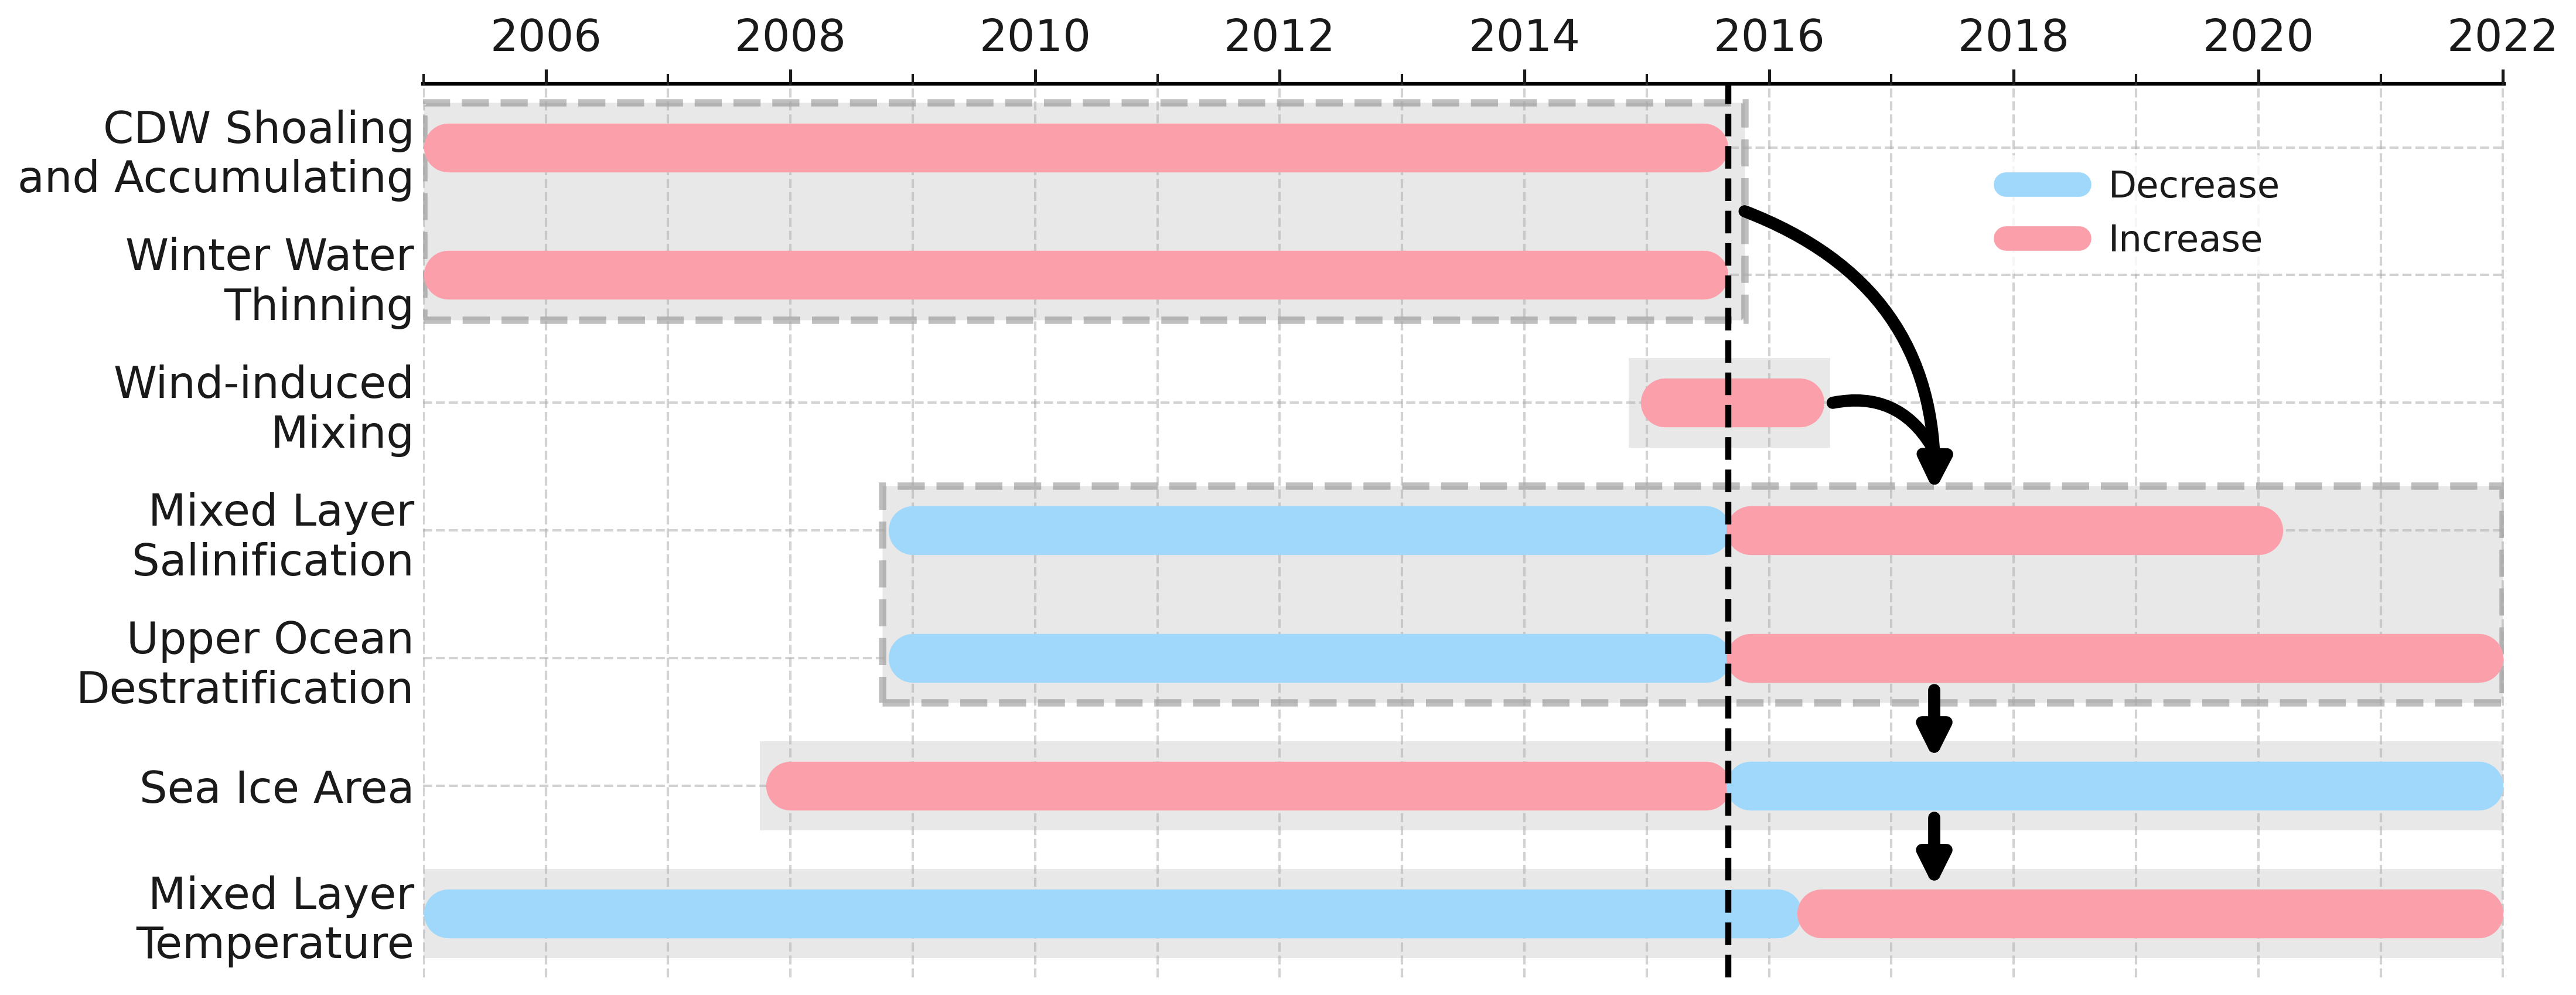

In [6]:
# Data for the events
events = [
    {"label": "Mixed Layer\nTemperature", "start": 2005.2, "end_blue": 2016.25, "end_red": 2022},
    {"label": "Sea Ice Area", "start": 2008, "end_blue": 2015 + 8/12, "end_red": 2022},
    {"label": "Upper Ocean\nDestratification", "start": 2009, "end_blue": 2015+8/12, "end_red":2022},
    {"label": "Mixed Layer\nSalinification", "start": 2009, "end_blue": 2015+8/12, "end_red": 2020},
    {"label": "Wind-induced\nMixing", "start": 2015.15, "end_red": 2016.25},
    {"label": "Winter Water\nThinning", "start": 2005.2, "end_red": 2015+8/12},
    {"label": "CDW Shoaling\nand Accumulating", "start": 2005.2, "end_red": 2015+8/12},
]

# Figure setup
fig, ax = plt.subplots(figsize=(15, 6.),dpi=300)
ax.set_xlim(2005-.005, 2022.005)
ax.set_ylim(-0.5, len(events) - 0.5)
ax.set_yticks(range(len(events)))
ax.set_yticklabels([e["label"] for e in events],)
#ax.set_xlabel("Time")
#ax.axvline(2015, color="black", linestyle="--", linewidth=1)
#ax.axvline(2016, color="black", linestyle="--", linewidth=1)
ax.axvline(2015+8/12, color="black", linestyle="--", linewidth=2.5,zorder=11)

# Adding the lines
line_kw = dict(linewidth=20, marker=None, solid_capstyle='round',zorder=10)
color_blue = '#a0d8fb'
color_red  = '#fba0ab'
adj = 0.2
for i, event in enumerate(events):
    y = i
    if event["label"] == "Sea Ice Area":
        # Swapping blue and red for this event
        if "end_blue" in event:
            ax.plot([event["start"], event["end_blue"] - adj * 0.9], [y, y], color=color_red, **line_kw)  # Now red
        if "end_red" in event:
            start_blue = event.get("end_blue", event["start"]) + (adj * 0.9 if "end_blue" in event else 0)
            end_blue = event["end_red"] - (adj if event["end_red"] in (2022, 2015 + 8 / 12) else 0)
            ax.plot([start_blue, end_blue], [y, y], color=color_blue, **line_kw)  # Now blue
    else:
        # Original logic for all other events
        if "end_blue" in event:
            ax.plot([event["start"], event["end_blue"] - adj * 0.9], [y, y], color=color_blue, **line_kw)
        if "end_red" in event:
            start_red = event.get("end_blue", event["start"]) + (adj * 0.9 if "end_blue" in event else 0)
            end_red = event["end_red"] - (adj if event["end_red"] in (2022, 2015 + 8 / 12) else 0)
            ax.plot([start_red, end_red], [y, y], color=color_red, **line_kw)


# Legend
ax.plot([], [], color=color_blue, linewidth=10, label="Decrease")
ax.plot([], [], color=color_red,  linewidth=10, label="Increase")
leg = ax.legend(loc=2, fontsize=15, bbox_to_anchor=(0.745, 0.94))
leg.get_frame().set_linewidth(0)

# move xticks to top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# remove spintes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_linewidth(1.5)
ax.set_xticks(np.arange(2006,2023,2))
ax.set_xticks(np.arange(2005,2023,2),minor=True)
plt.tick_params(axis='y', which='both', length=0)

# add grid lines
ax.grid(ls='--',color='darkgrey',zorder=0,alpha=0.5)
ax.grid(ls='--',color='darkgrey',zorder=0,alpha=0.5,which='minor',axis='x')

# Add curly brace covering the first two rows
#ax.annotate(r"$\}$",fontsize=60,xy=(2015.9, 5.5), xycoords='data',ha='center',va='center')

# Add a grey box behind the top two rows
rec_kw = dict(facecolor="lightgrey", alpha=0.5, zorder=0,)
ax.add_patch(Rectangle((2005, -0.35), 17, .7, edgecolor='None', **rec_kw)) # MLT
ax.add_patch(Rectangle((2007.75, 1-0.35), 14.25, .7, edgecolor='None', **rec_kw)) # sea ice loss
#ax.add_patch(Rectangle((2008.75, 1.65), 17, 2.7, **rec_kw)) # MLS, N2 and wind
ax.add_patch(Rectangle((2008.75, 1.65), 13.25, 1.7, edgecolor='grey',lw=3,ls='--', **rec_kw)) # MLS, N2 
ax.add_patch(Rectangle((2014.85, 3.65), 1.65, .7,edgecolor='None',  **rec_kw)) #  wind
ax.add_patch(Rectangle((2005, 4.65), 10.8, 1.7, edgecolor='grey',lw=3,ls='--', **rec_kw)) # CDW and WW


arr_kw = dict(linewidth=3,mutation_scale=25,zorder=15,shrinkA=0,shrinkB=0,lw=5)
add_arrow(ax,x_start=2015.8,x_end=2017.35,y_start=5.5,y_end=1.6+1.7,rad=-0.35,**arr_kw)
add_arrow(ax,x_start=2016.52,x_end=2017.33,y_start=4,y_end=3.6575,rad=-0.35,arrowstyle='-',**arr_kw)
add_arrow(ax,x_start=2017.35,x_end=2017.35,y_start=1.75,y_end=1.2,rad=-0.0,**arr_kw)
add_arrow(ax,x_start=2017.35,x_end=2017.35,y_start=0.75,y_end=0.2,rad=-0.0,**arr_kw)

plt.tight_layout()
plt.show()
